<img src="https://byrony.github.io/figure/customer_segment.jpg" width="450">

# Wholesale Customers Data

El dataset "Wholesale customers data" es un conjunto popular utilizado en tareas de aprendizaje automático, especialmente para la segmentación de clientes. Proviene de la donación de datos del repositorio **UCI Machine Learning** y representa los gastos anuales de diversos clientes de un distribuidor mayorista para diferentes categorías de productos.

## Características del conjunto de datos:

1. **FRESH**: gasto anual (m.u.) en productos frescos.
2. **MILK**: gasto anual (m.u.) en productos lácteos.
3. **GROCERY**: gasto anual (m.u.) en productos de abarrotes.
4. **FROZEN**: gasto anual (m.u.) en productos congelados.
5. **DETERGENTS_PAPER**: gasto anual (m.u.) en detergentes y productos de papel.
6. **DELICATESSEN**: gasto anual (m.u.) en productos delicatessen.

Además, hay otros dos atributos:

7. **CHANNEL**: canal de compra del cliente (Horeca (hotel/restaurante/cafetería) o canal minorista).
8. **REGION**: región del cliente.



## Consigna:

El objetivo de este proyecto es poder segmentar a los clientes en diferentes grupos. La cantidad de grupos la debemos definir nosotros tomando en cuenta métricas como **Elbow method**, **silhouette_scores** y **calinski_scores**.

Analizamos si es mejor utilizar las 8 columnas (incluyendo CHANNEL y REGION) o es mejor solo utilizar las columnas del dataset que representan gastos anuales (6 columnas).

Se deben tener en total 9 conjuntos de datos. Ya que se debe normalizar la data con **StandardScaler**, **MinMaxScaler** y **Normalizer**; y para cada escalamiento se deben hacer 3 enfoques, uno con la totalidad de los features (8 o 6 features según su análisis del paso anterior), otro con PCA de 2 componentes y otro con PCA de 3 componentes, lo cual hace un total de 9 conjuntos de datos.

Una vez obtenido los 9 conjuntos, recién se evalúan las métricas mencionadas y se selecciona el número de clusters (grupos) analizando cúal tiene resultados más prometedores según las métricas.

Finalmente redactamos qué cantidad de cluster se seleccionó y con cuál de los 9 conjuntos de datos.

Teniendo en cuenta que es importante que se muestre las gráficas de cada métrica para cada conjunto de datos y también se deben mostrar las gráficas de dispersión, tanto de los datos con los features totales, como la de los PCA de 2 componentes (gráfica 2D) y la de PCA de 3 componentes (gráfica 3D). Así mismo, es importante que para cada PCA de cada conjunto de datos se muestre el **explained_variance_ratio_**, para saber qué porcentaje de datos se está utilizando y cuánta información se está perdiendo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler

from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
294,1,2,21273,2013,6550,909,811,1854
62,2,3,7823,6245,6544,4154,4074,964
414,1,3,5969,1990,3417,5679,1135,290
388,1,3,9785,848,1172,1677,200,406
97,1,3,403,254,610,774,54,63
184,1,3,327,918,4710,74,334,11
239,1,1,47493,2567,3779,5243,828,2253
125,1,3,76237,3473,7102,16538,778,918
365,2,3,4692,6128,8025,1619,4515,3105
205,2,1,1107,11711,23596,955,9265,710


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


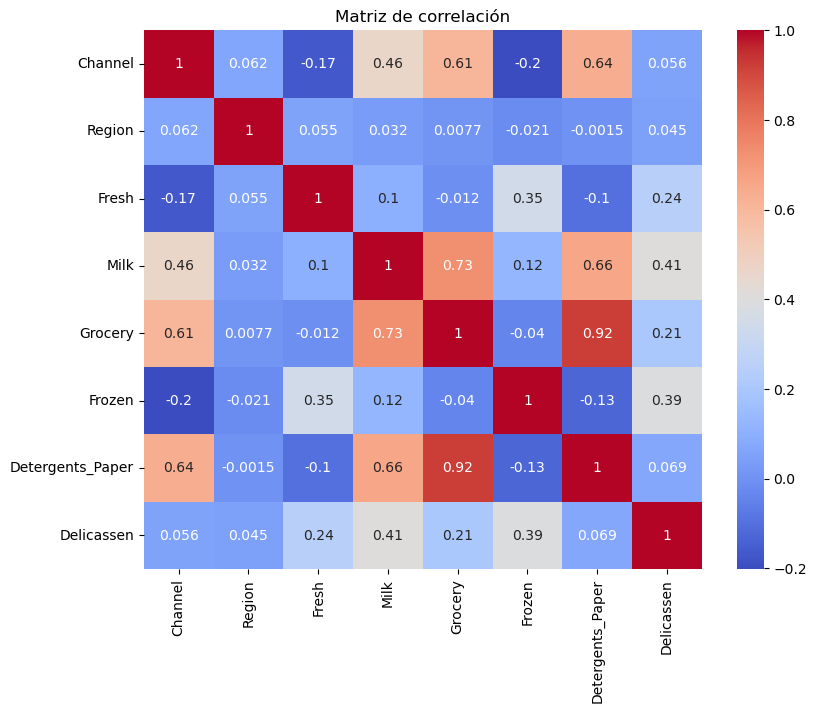

In [4]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

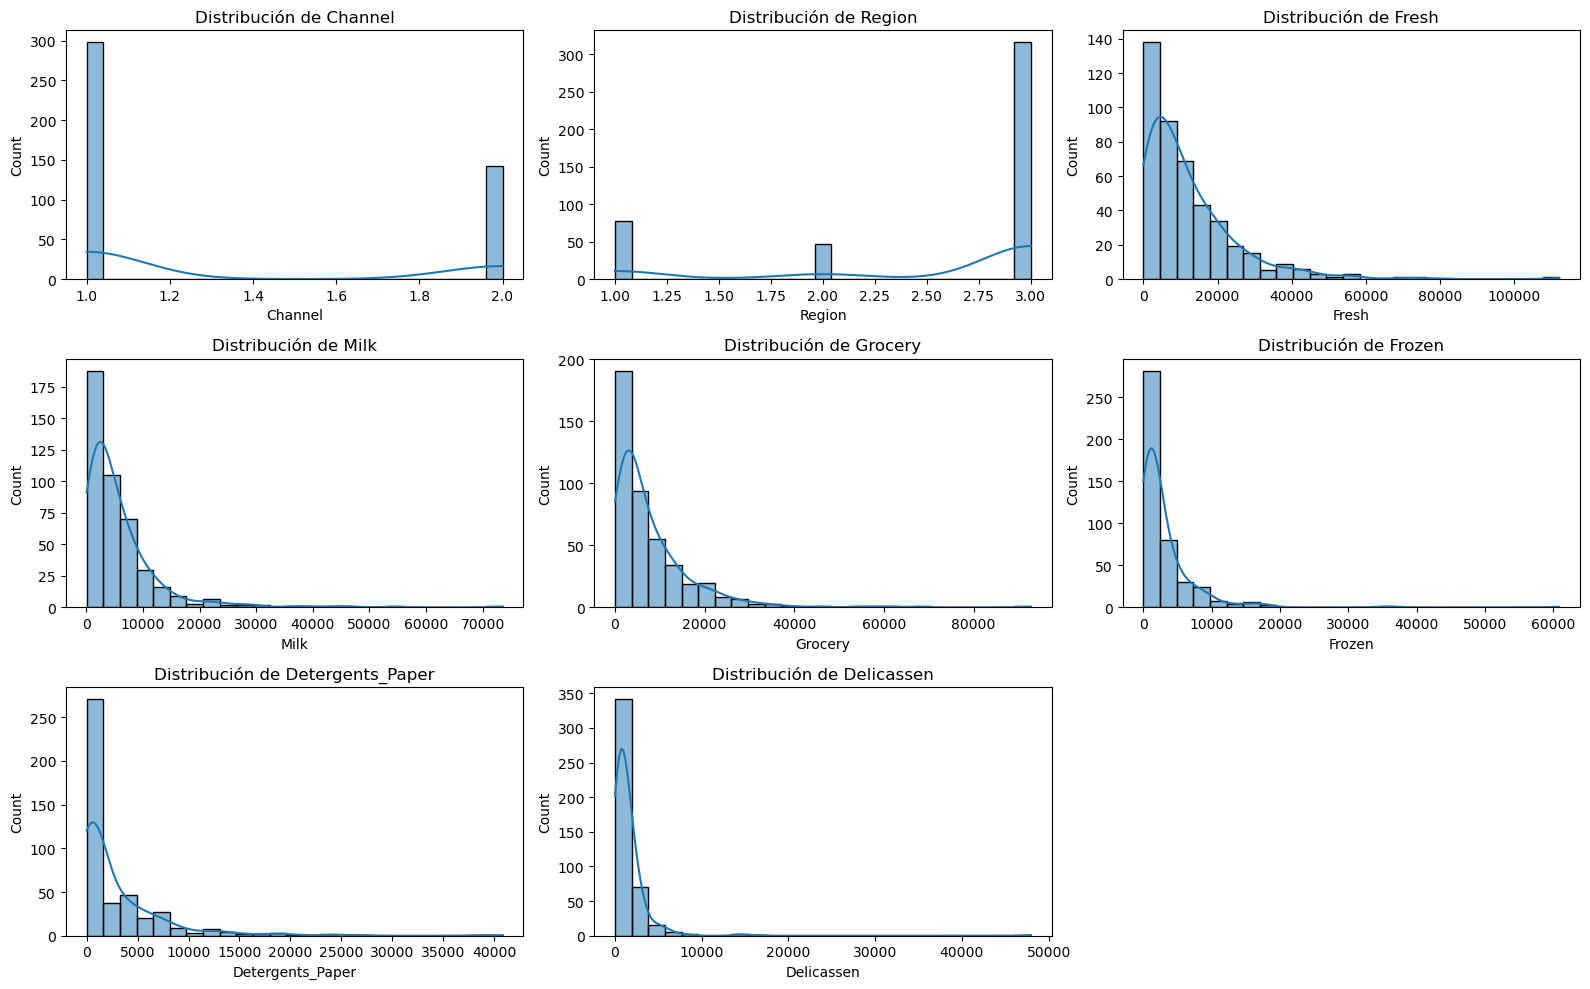

In [5]:
features = list(df.columns)

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=25, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

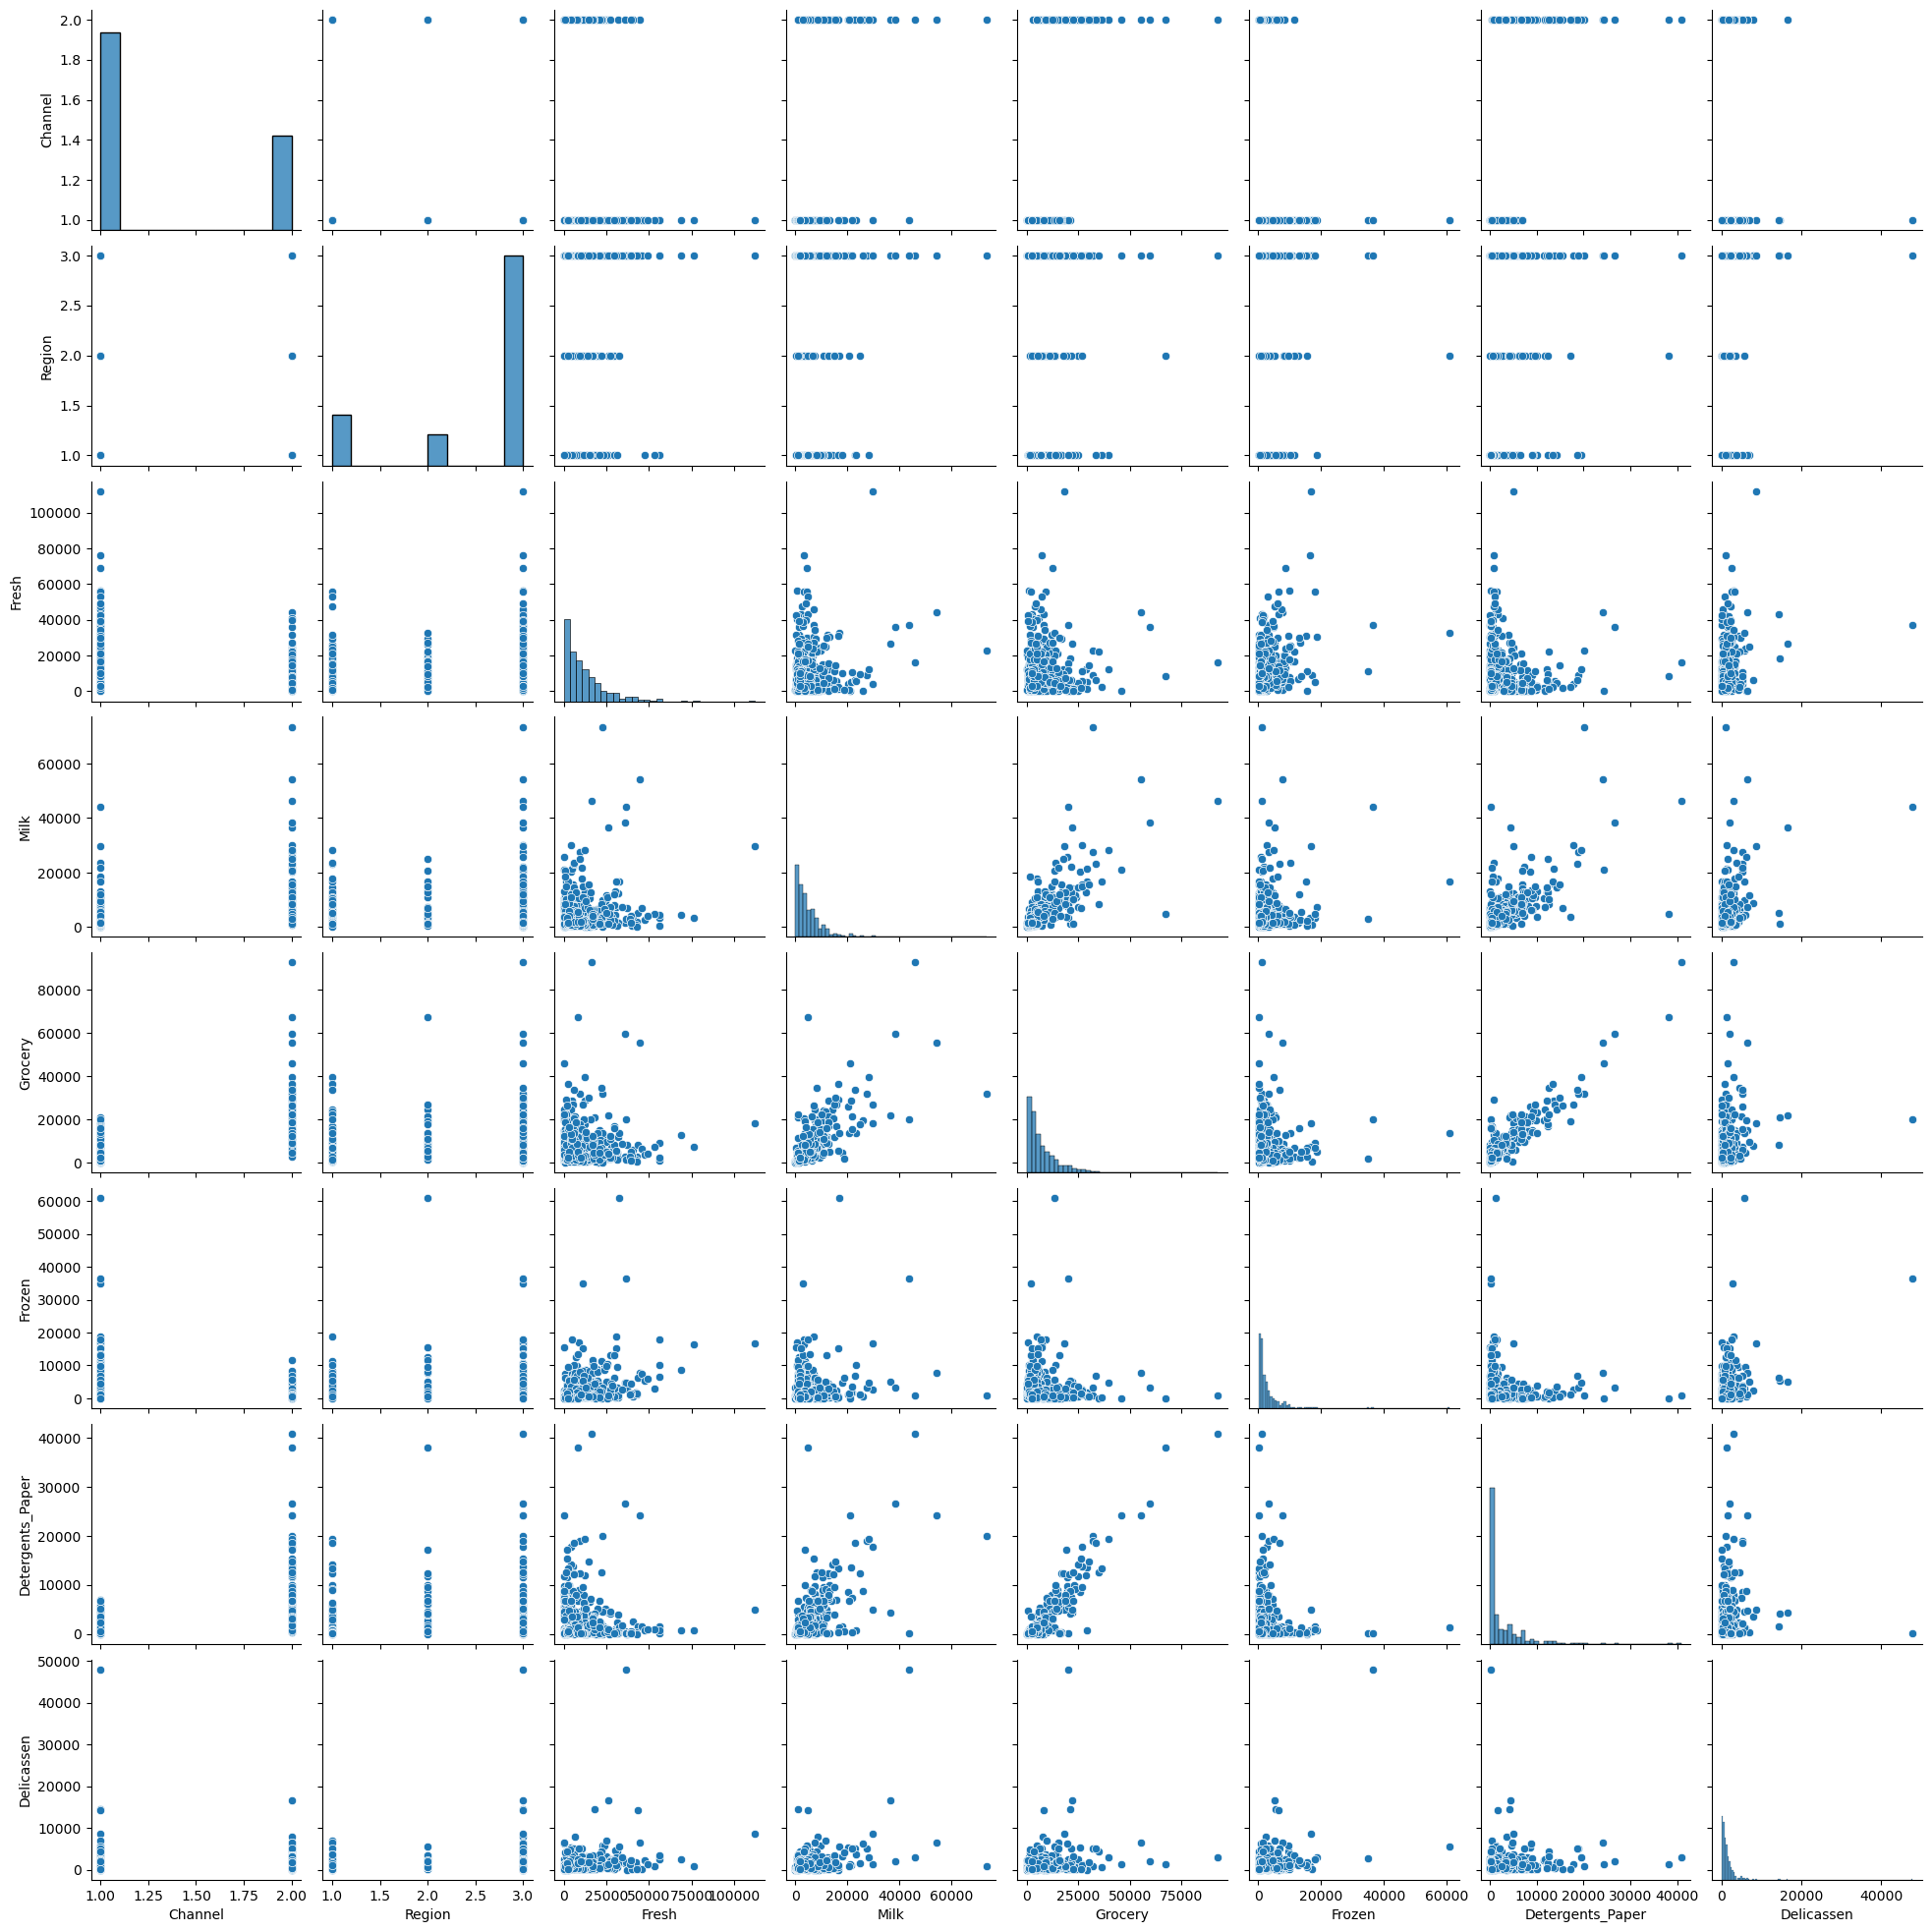

In [6]:
sns.pairplot(df[features])
plt.show()

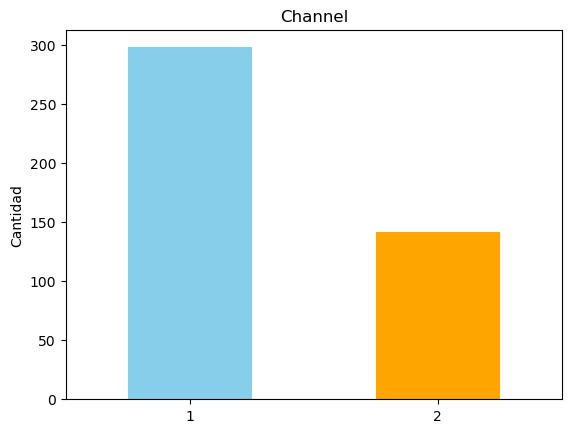

In [9]:
cuenta = df['Channel'].value_counts()

cuenta.plot(kind='bar', color=['skyblue', 'orange','green'])
plt.title('Channel')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.show()

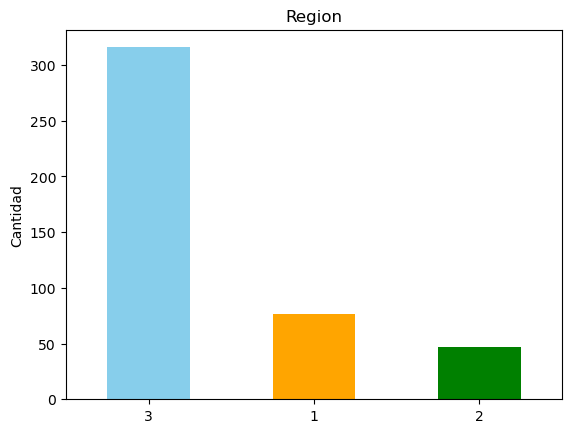

In [10]:
cuenta = df['Region'].value_counts()

cuenta.plot(kind='bar', color=['skyblue', 'orange','green'])
plt.title('Region')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.show()

In [11]:
# Hacemos el remuestreo
ros = RandomOverSampler(random_state=42)

X = df.drop('Channel', axis=1)
y = df['Channel']

X_ros, y_ros = ros.fit_resample(X, y)

df_resampled = pd.DataFrame(X_ros, columns=df.columns.drop('Channel'))
df_resampled['Channel'] = y_ros

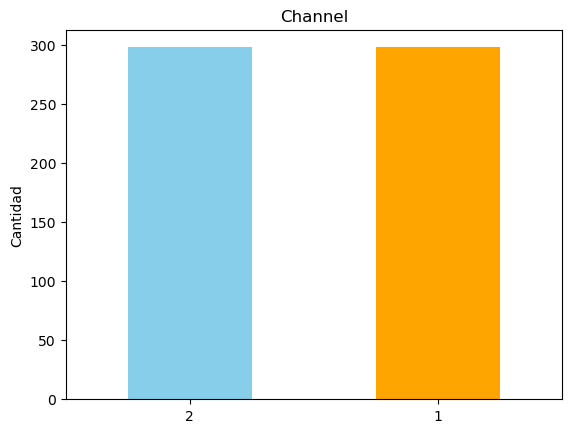

In [12]:
cuenta = df_resampled['Channel'].value_counts()

cuenta.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Channel')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.show()

In [16]:
# Hacemos el remuestreo
ros1 = RandomOverSampler(random_state=42)

X1 = df_resampled.drop('Region', axis=1)
y1 = df_resampled['Region']

X_ros1, y_ros1 = ros1.fit_resample(X1, y1)

df_resampled1 = pd.DataFrame(X_ros1, columns=df_resampled.columns.drop('Region'))
df_resampled1['Region'] = y_ros1

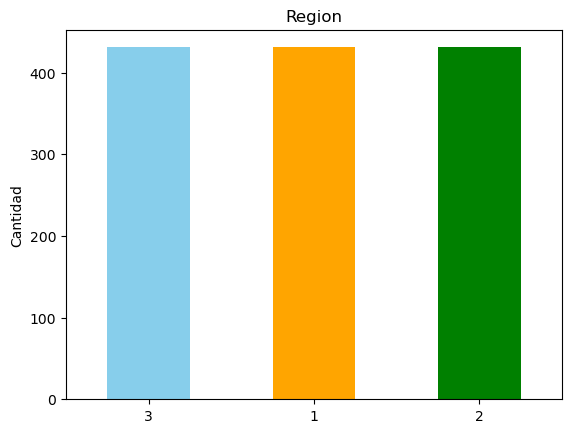

In [18]:
cuenta1 = df_resampled1['Region'].value_counts()

cuenta1.plot(kind='bar', color=['skyblue', 'orange','green'])
plt.title('Region')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.show()

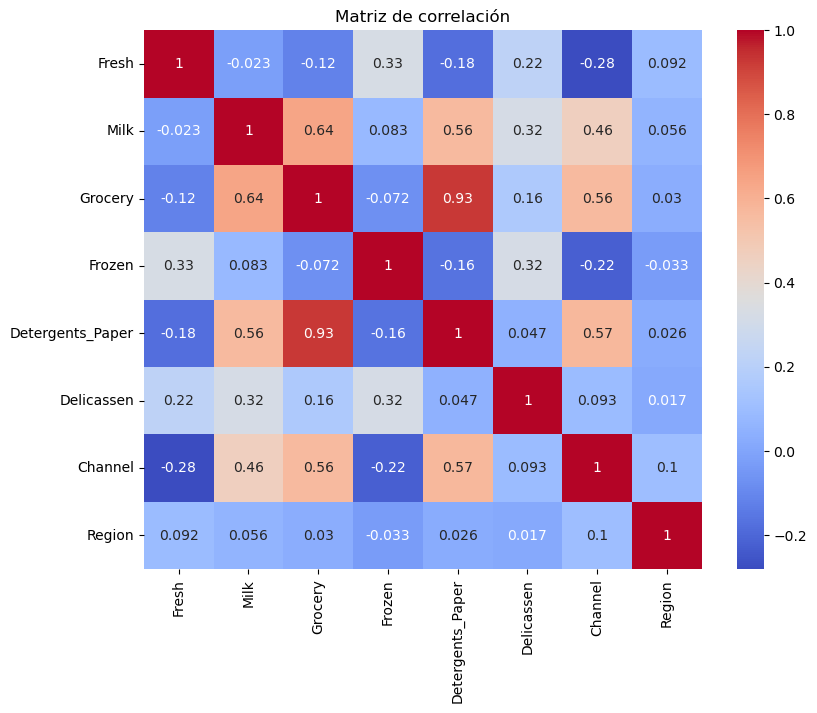

In [20]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_resampled1.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

In [21]:
df_resampled1=df_resampled1.drop('Region', axis=1)

X = df_resampled1.drop('Channel', axis=1)
y = df_resampled1["Channel"]

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(data_scaled, columns=X.columns)
df_scaled['Channel'] = y
df_scaled.sample(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
1194,-0.066880,-0.760527,-0.691024,0.783439,-0.638726,-0.329406,1
871,-0.648450,-0.085327,0.340923,-0.470572,0.867801,0.626403,2
589,1.053352,0.067636,0.045989,-0.367914,-0.293810,0.608943,2
860,-0.878710,0.421599,1.095462,-0.156122,0.149047,0.516156,2
227,-0.557825,-0.640151,-0.786688,-0.145856,-0.670486,-0.418701,1
730,3.460268,-0.589163,-0.584406,0.321160,-0.570240,0.361510,1
150,0.568787,-0.693386,-0.768249,-0.372178,-0.686986,-0.230133,1
814,0.028184,1.574650,-0.495954,0.233190,-0.442670,0.866353,1
171,-0.913111,2.682893,0.879488,-0.404081,0.839413,2.355439,2
970,-0.689601,-0.782860,-0.442645,1.006760,-0.615484,0.206366,1


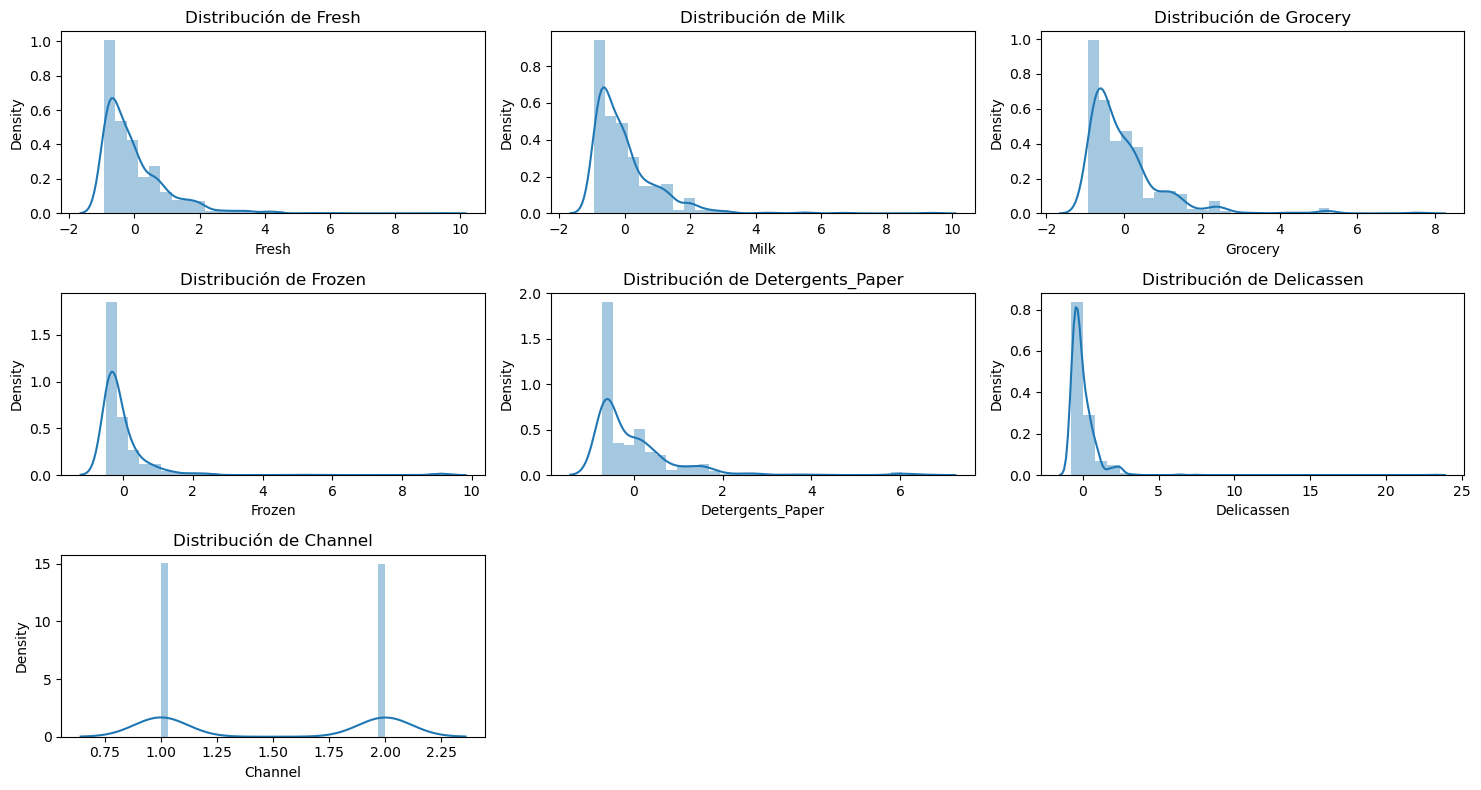

In [26]:
features = list(df_scaled.columns)

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df_scaled[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Data "original" preprocesada escalada con Stardarscaler
df_scaled = pd.DataFrame(df_scaled, columns=df_scaled.columns).copy()
df_scaled['Channel'] = y

# PCA 3 componentes escalada con Stardarscaler
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(df_scaled)

# PCA 2 componentes escalada con Stardarscaler
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(df_scaled)

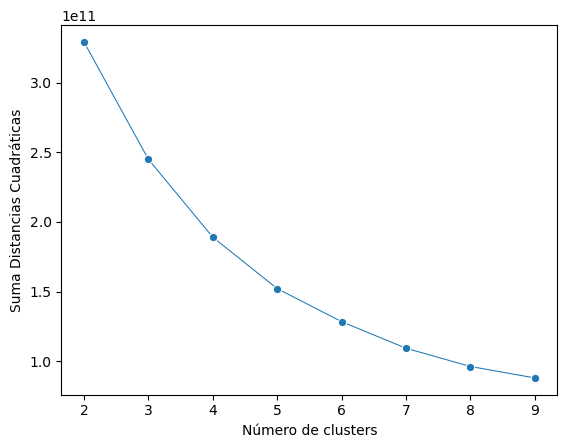

In [186]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples

sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=0) 
    kmeans.fit(df_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

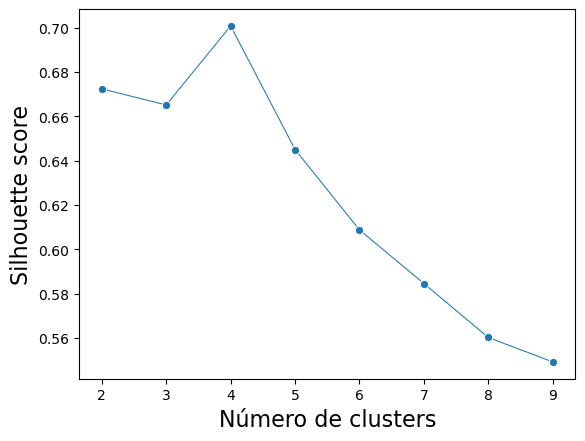

In [167]:
sil_standar_original=[]
k_values=range(2,10)

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans.fit(df_scaled)
    score=silhouette_score(df_scaled,kmeans.labels_)
    sil_standar_original.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

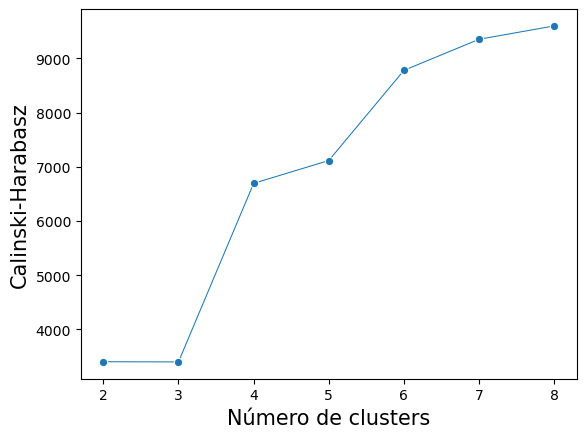

In [187]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,9);
ch_standar_original=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(df_scaled)
    score=calinski_harabasz_score(df_scaled,kmeans.labels_)
    ch_standar_original.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

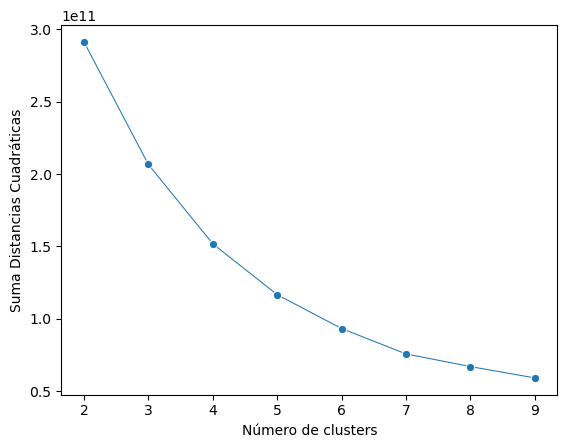

In [188]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans1=KMeans(n_clusters=k,random_state=0) 
    kmeans1.fit(X_pca_3)
    sq_distances.append(kmeans1.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

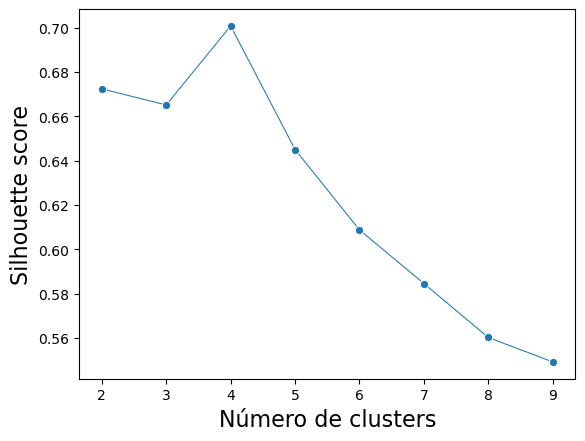

In [189]:
sil_standar_3=[]
k_values=range(2,10)

for k in k_values:
    kmeans1=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans1.fit(X_pca_3)
    score=silhouette_score(X_pca_3,kmeans1.labels_)
    sil_standar_3.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

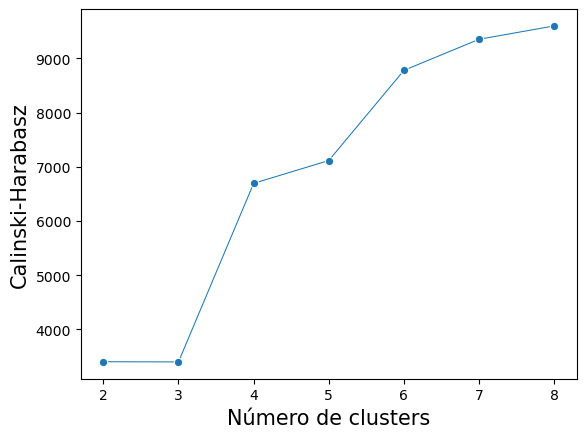

In [190]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,9);
ch_standar_3=[]

for k in k_values:
    
    kmeans1=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans1.fit(X_pca_3)
    score=calinski_harabasz_score(X_pca_3,kmeans1.labels_)
    ch_standar_3.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

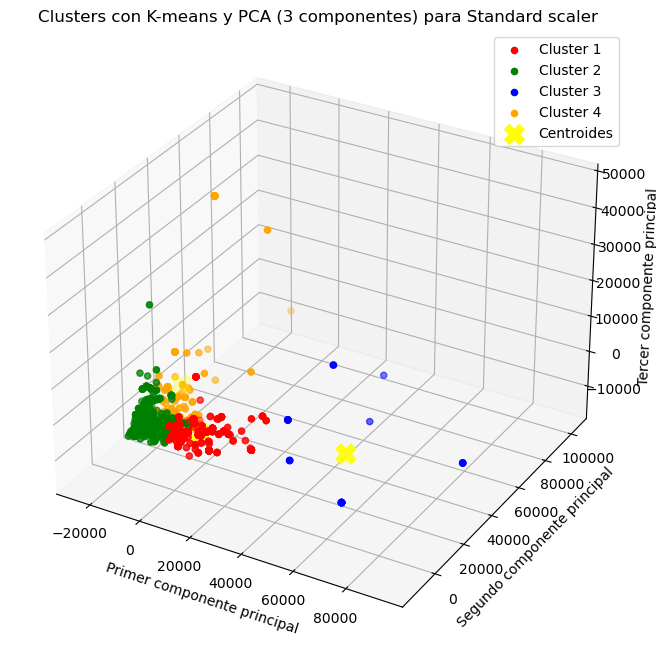

In [231]:
from mpl_toolkits.mplot3d import Axes3D

kmeans_3_pca3_standarscaler = KMeans(n_clusters=4, random_state=0).fit(X_pca_3)
labels_3_pca3_standarscaler = kmeans_3_pca3_standarscaler.labels_

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue','orange']
for i, color in zip(range(5), colors):
    ax.scatter(X_pca_3[labels_3_pca3_standarscaler == i, 0], X_pca_3[labels_3_pca3_standarscaler == i, 1], X_pca_3[labels_3_pca3_standarscaler == i, 2],color=color, label=f'Cluster {i+1}')

ax.scatter(kmeans_3_pca3_standarscaler.cluster_centers_[:, 0], kmeans_3_pca3_standarscaler.cluster_centers_[:, 1], kmeans_3_pca3_standarscaler.cluster_centers_[:, 2],s=200, c='yellow', marker='X', label='Centroides')
ax.set_title('Clusters con K-means y PCA (3 componentes) para Standard scaler')
ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segundo componente principal')
ax.set_zlabel('Tercer componente principal')
ax.legend()
ax.grid(True)
plt.show()

In [192]:
# Porcentaje de varianza explicada por cada componente en PCA de 3 componentes
explained_variance_ratio_3 = pca_3.explained_variance_ratio_

explained_variance_ratio_df_3 = pd.DataFrame({
    'Componente Principal': ['PC1', 'PC2', 'PC3'],
    'Varianza Explicada (%)': explained_variance_ratio_3 * 100
})

explained_variance_ratio_df_3

,Componente Principal,Varianza Explicada (%)
0,PC1,49.066791
1,PC2,32.667040
2,PC3,10.045351


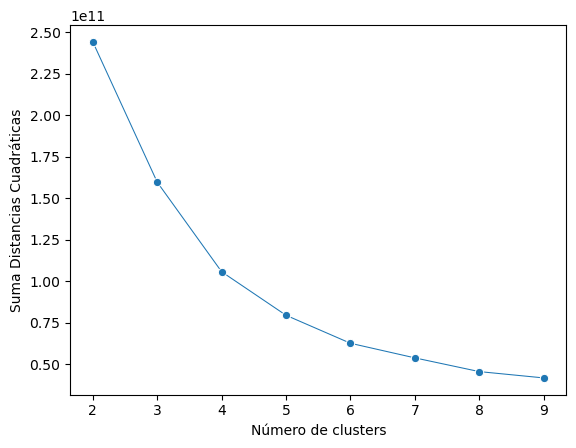

In [193]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans2=KMeans(n_clusters=k,random_state=0) 
    kmeans2.fit(X_pca_2)
    sq_distances.append(kmeans2.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

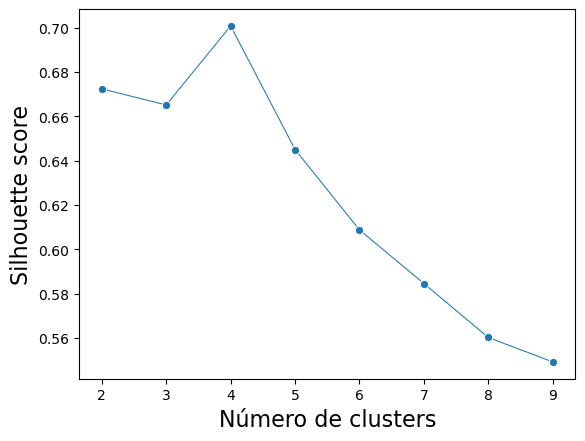

In [194]:
sil_standar_2=[]
k_values=range(2,10)

for k in k_values:
    kmeans2=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans2.fit(X_pca_2)
    score=silhouette_score(X_pca_2,kmeans2.labels_)
    sil_standar_2.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

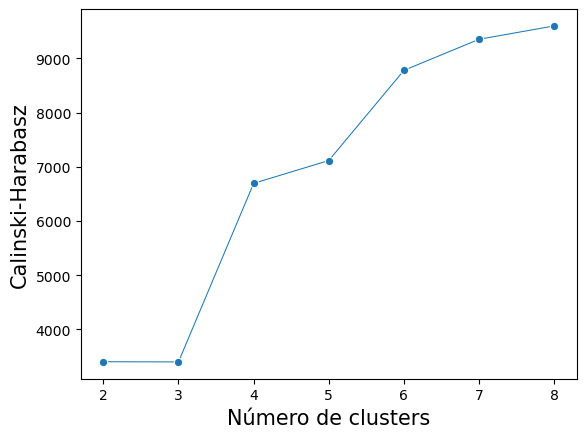

In [195]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,9);
ch_standar_2=[]

for k in k_values:
    
    kmeans2=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans2.fit(X_pca_2)
    score=calinski_harabasz_score(X_pca_2,kmeans2.labels_)
    ch_standar_2.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

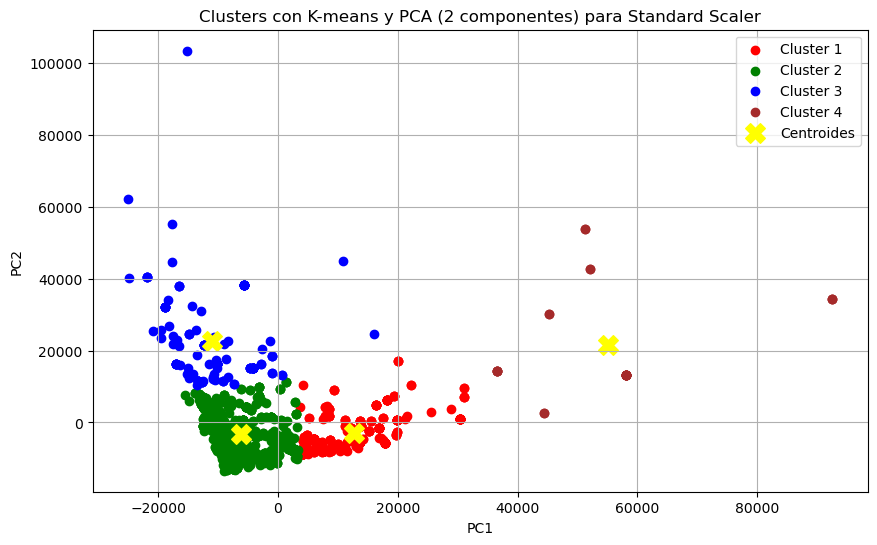

In [196]:
kmeans_Standardscaler = KMeans(n_clusters=4, random_state=0).fit(X_pca_2)
labels_Standardscaler = kmeans_Standardscaler.labels_

plt.figure(figsize=(10, 6))
for i, color in zip(range(4), ['red', 'green', 'blue','brown']):
    plt.scatter(X_pca_2[labels_Standardscaler == i, 0], X_pca_2[labels_Standardscaler == i, 1], color=color, label=f'Cluster {i+1}')
    
plt.scatter(kmeans_Standardscaler.cluster_centers_[:, 0], kmeans_Standardscaler.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroides')
plt.title('Clusters con K-means y PCA (2 componentes) para Standard Scaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
# Porcentaje de varianza explicada por cada componente en PCA de 2 componentes
explained_variance_ratio = pca_2.explained_variance_ratio_

explained_variance_ratio_df = pd.DataFrame({
    'Componente Principal': ['PC1', 'PC2'],
    'Varianza Explicada (%)': explained_variance_ratio * 100
})

explained_variance_ratio_df

,Componente Principal,Varianza Explicada (%)
0,PC1,49.066791
1,PC2,32.667040


In [198]:
scaler1 = MinMaxScaler()
data_scaled1 = scaler1.fit_transform(X)
df_scaled1 = pd.DataFrame(data_scaled1, columns=X.columns)
df_scaled1['Channel'] = y
df_scaled1.sample(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
58,0.122838,0.026075,0.017731,0.009385,0.005487,0.009032,1
1018,0.072110,0.042809,0.075266,0.023503,0.090853,0.011014,2
904,0.005074,0.132184,0.239057,0.036092,0.119513,0.053400,2
564,0.191372,0.097872,0.115136,0.014052,0.058373,0.057280,2
587,0.005074,0.132184,0.239057,0.036092,0.119513,0.053400,2
534,0.191372,0.097872,0.115136,0.014052,0.058373,0.057280,2
95,0.000000,0.039010,0.067355,0.006821,0.005389,0.014727,1
748,0.004556,0.112577,0.074005,0.008283,0.002205,0.021631,1
875,0.166646,0.051509,0.006359,0.075751,0.000612,0.025282,1
1012,0.154474,0.031576,0.030600,0.018473,0.008524,0.019232,1


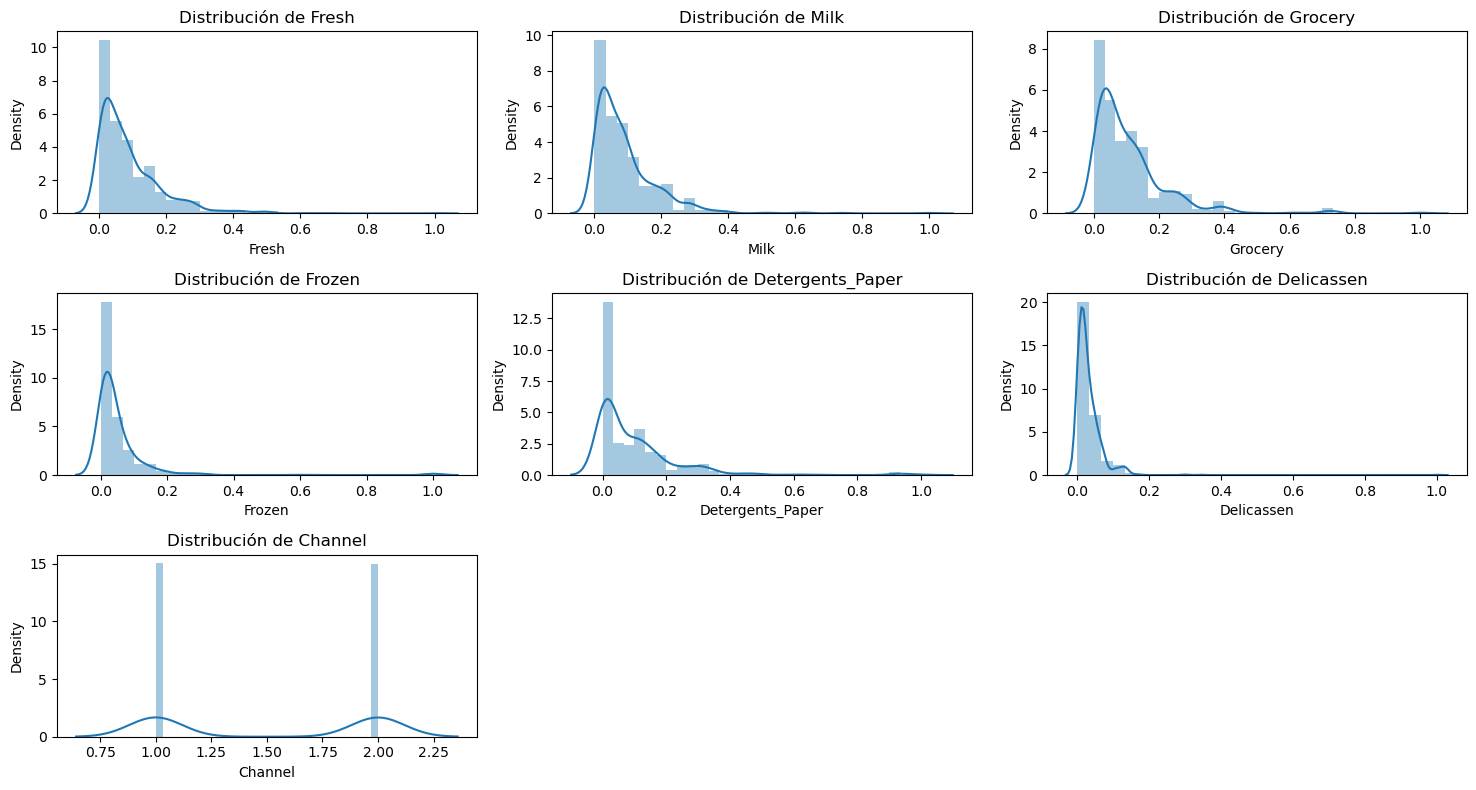

In [199]:
features = list(df_scaled1.columns)

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df_scaled1[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

In [200]:
# Data "original" preprocesada escalada con MinMaxScaler
df_scaled1 = pd.DataFrame(df_scaled1, columns=df_scaled1.columns).copy()
df_scaled1['Channel'] = y

# PCA 3 componentes escalada con MinMaxScaler
pca_3_1 = PCA(n_components=3)
X_pca_3_1 = pca_3_1.fit_transform(df_scaled1)

# PCA 2 componentes escalada con MinMaxScaler
pca_2_1 = PCA(n_components=2)
X_pca_2_1 = pca_2_1.fit_transform(df_scaled1)

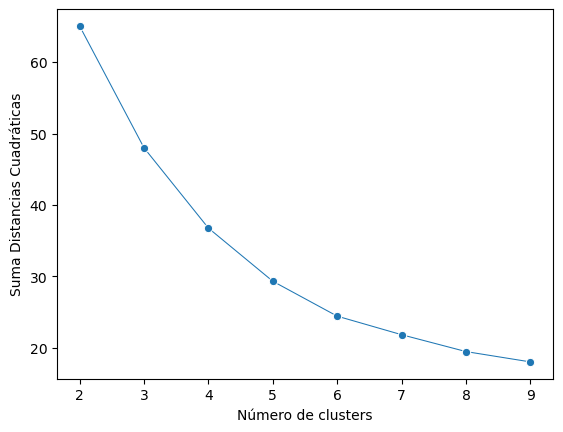

In [201]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans3=KMeans(n_clusters=k,random_state=0) 
    kmeans3.fit(df_scaled1)
    sq_distances.append(kmeans3.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

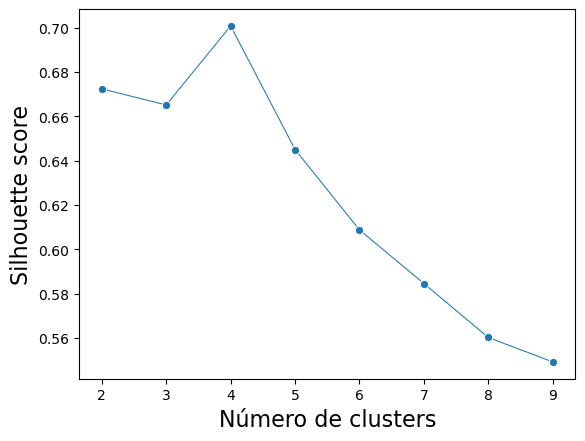

In [202]:
sil_minmaxscaler_original=[]
k_values=range(2,10)

for k in k_values:
    kmeans3=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans3.fit(df_scaled1)
    score=silhouette_score(df_scaled1,kmeans3.labels_)
    sil_minmaxscaler_original.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

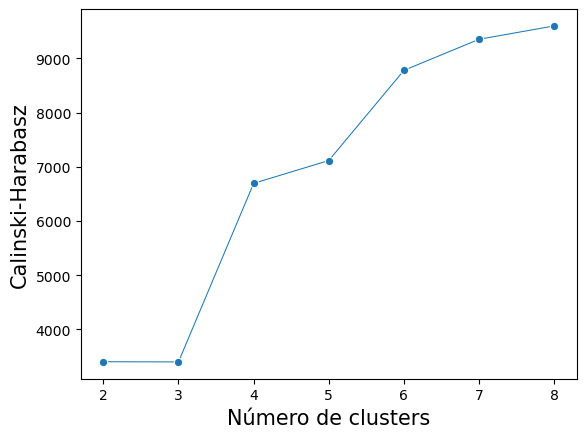

In [203]:
k_values=range(2,9);
ch_minmaxscaler_original=[]

for k in k_values:
    
    kmeans3=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans3.fit(df_scaled1)
    score=calinski_harabasz_score(df_scaled1,kmeans3.labels_)
    ch_minmaxscaler_original.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

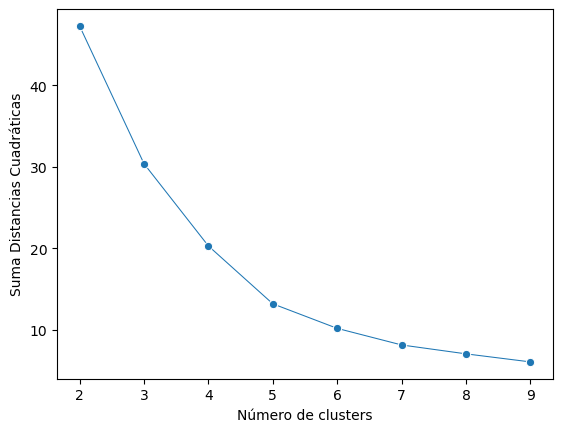

In [204]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans4=KMeans(n_clusters=k,random_state=0) 
    kmeans4.fit(X_pca_3_1)
    sq_distances.append(kmeans4.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

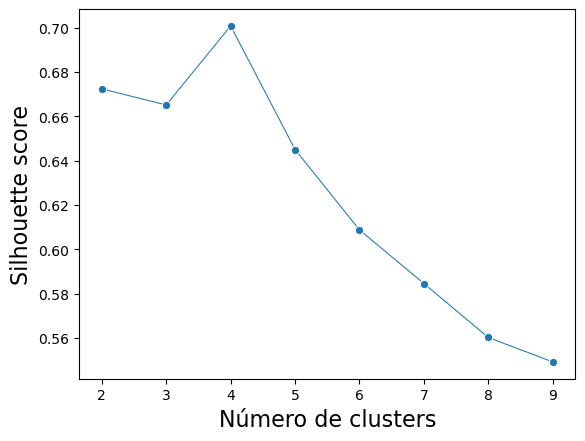

In [205]:
sil_minmaxscaler_3=[]
k_values=range(2,10)

for k in k_values:
    kmeans4=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans4.fit(X_pca_3_1)
    score=silhouette_score(X_pca_3_1,kmeans4.labels_)
    sil_minmaxscaler_3.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

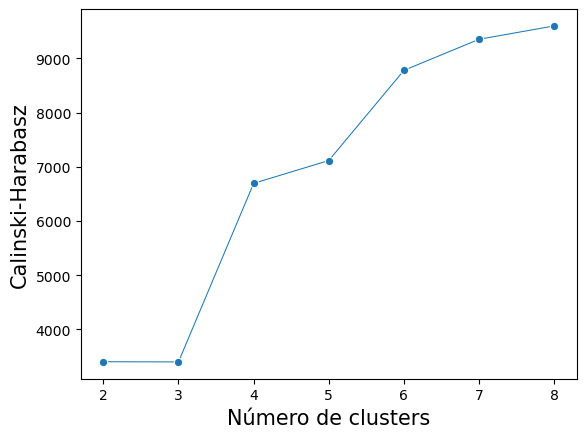

In [206]:
k_values=range(2,9);
ch_minmaxscaler_3=[]

for k in k_values:
    
    kmeans4=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans4.fit(X_pca_3_1)
    score=calinski_harabasz_score(X_pca_3_1,kmeans4.labels_)
    ch_minmaxscaler_3.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

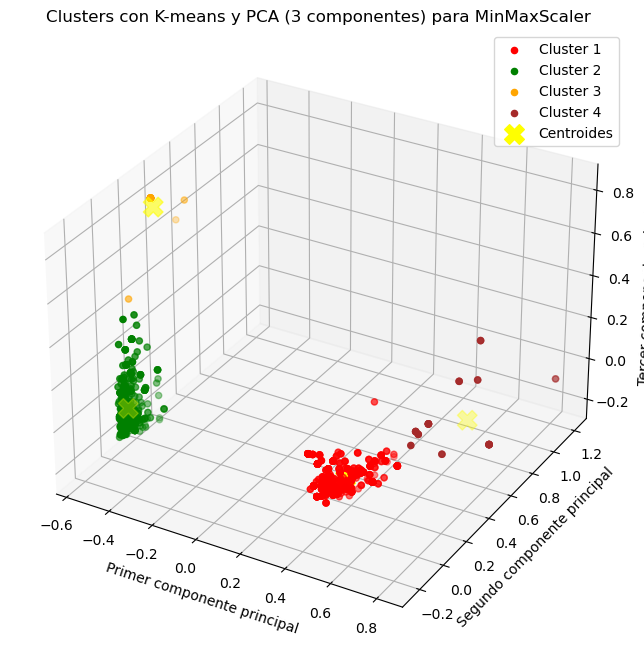

In [232]:
from mpl_toolkits.mplot3d import Axes3D

kmeans_3_pca3_MinMaxScaler = KMeans(n_clusters=4, random_state=0).fit(X_pca_3_1)
labels_3_pca3_MinMaxScaler = kmeans_3_pca3_MinMaxScaler.labels_

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green','orange','brown']
for i, color in zip(range(4), colors):
    ax.scatter(X_pca_3_1[labels_3_pca3_MinMaxScaler == i, 0], X_pca_3_1[labels_3_pca3_MinMaxScaler == i, 1], X_pca_3_1[labels_3_pca3_MinMaxScaler == i, 2],color=color, label=f'Cluster {i+1}')

ax.scatter(kmeans_3_pca3_MinMaxScaler.cluster_centers_[:, 0], kmeans_3_pca3_MinMaxScaler.cluster_centers_[:, 1], kmeans_3_pca3_MinMaxScaler.cluster_centers_[:, 2],s=200, c='yellow', marker='X', label='Centroides')
ax.set_title('Clusters con K-means y PCA (3 componentes) para MinMaxScaler')
ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segundo componente principal')
ax.set_zlabel('Tercer componente principal')
ax.legend()
ax.grid(True)
plt.show()

In [208]:
# Porcentaje de varianza explicada por cada componente en PCA de 3 componentes
explained_variance_ratio_3_1 = pca_3_1.explained_variance_ratio_

explained_variance_ratio_df_3_1 = pd.DataFrame({
    'Componente Principal': ['PC1', 'PC2', 'PC3'],
    'Varianza Explicada (%)': explained_variance_ratio_3_1 * 100
})

explained_variance_ratio_df_3_1

,Componente Principal,Varianza Explicada (%)
0,PC1,84.389936
1,PC2,7.100870
2,PC3,4.142810


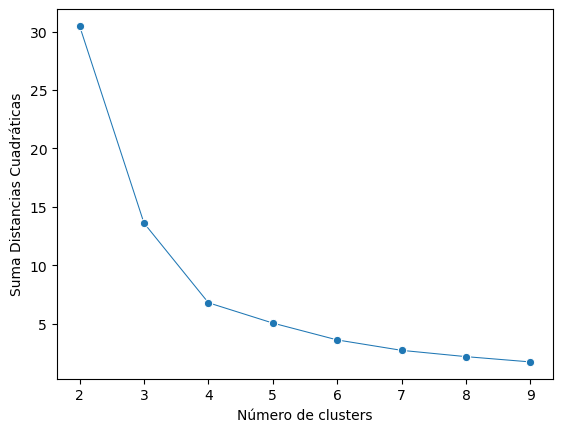

In [209]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans5=KMeans(n_clusters=k,random_state=0) 
    kmeans5.fit(X_pca_2_1)
    sq_distances.append(kmeans5.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

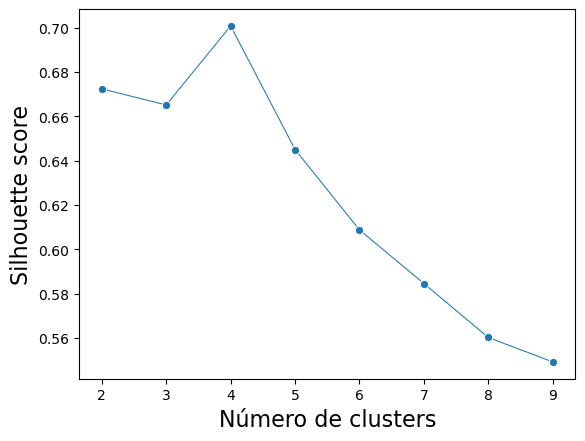

In [210]:
sil_minmaxscaler_2=[]
k_values=range(2,10)

for k in k_values:
    kmeans5=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans5.fit(X_pca_2_1)
    score=silhouette_score(X_pca_2_1,kmeans5.labels_)
    sil_minmaxscaler_2.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

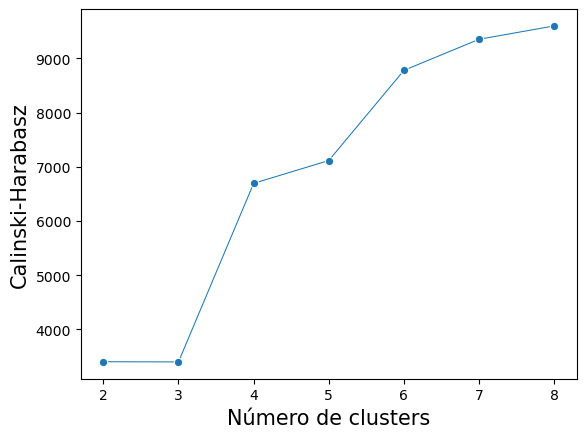

In [211]:
k_values=range(2,9);
ch_minmaxscaler_2=[]

for k in k_values:
    
    kmeans5=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans5.fit(X_pca_2_1)
    score=calinski_harabasz_score(X_pca_2_1,kmeans5.labels_)
    ch_minmaxscaler_2.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

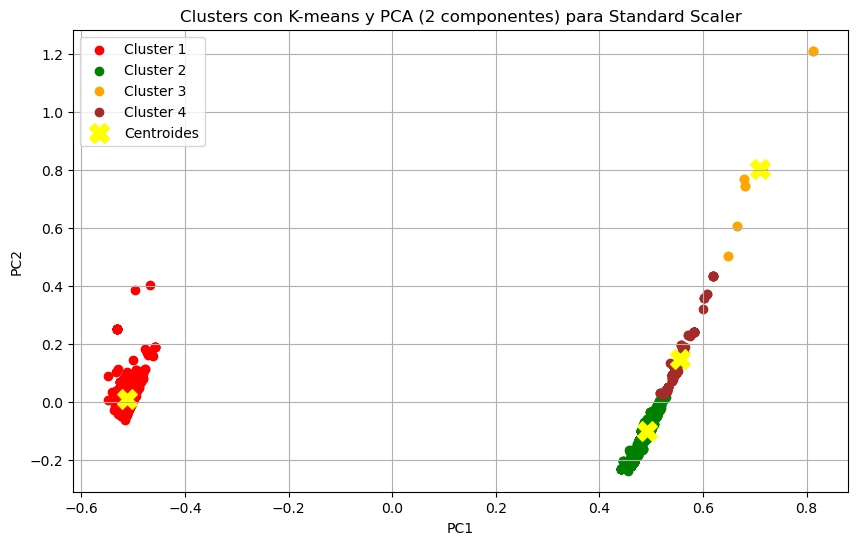

In [235]:
kmeans_MinMaxScaler = KMeans(n_clusters=4, random_state=0).fit(X_pca_2_1)
labels_MinMaxScaler = kmeans_MinMaxScaler.labels_

plt.figure(figsize=(10, 6))
for i, color in zip(range(4), ['red', 'green','orange','brown']):
    plt.scatter(X_pca_2_1[labels_MinMaxScaler == i, 0], X_pca_2_1[labels_MinMaxScaler == i, 1], color=color, label=f'Cluster {i+1}')
    
plt.scatter(kmeans_MinMaxScaler.cluster_centers_[:, 0], kmeans_MinMaxScaler.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroides')
plt.title('Clusters con K-means y PCA (2 componentes) para Standard Scaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [236]:
# Porcentaje de varianza explicada por cada componente en PCA de 2 componentes
explained_variance_ratio_1 = pca_2_1.explained_variance_ratio_

explained_variance_ratio_df_1 = pd.DataFrame({
    'Componente Principal': ['PC1', 'PC2'],
    'Varianza Explicada (%)': explained_variance_ratio_1 * 100
})

explained_variance_ratio_df_1

,Componente Principal,Varianza Explicada (%)
0,PC1,84.389936
1,PC2,7.100870


In [214]:
scaler2 = Normalizer()
data_scaled2 = scaler2.fit_transform(X)
df_scaled2 = pd.DataFrame(data_scaled2, columns=X.columns)
df_scaled2['Channel'] = y
df_scaled2.sample(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
191,0.992554,0.021492,0.100611,0.064840,0.003133,0.006120,1
449,0.059834,0.392251,0.862200,0.004230,0.314481,0.015927,2
1092,0.000175,0.019451,0.410102,0.911266,0.000876,0.032126,1
1073,0.878375,0.169463,0.271265,0.330176,0.010229,0.130518,1
121,0.682102,0.548736,0.254176,0.406377,0.044795,0.043268,1
1004,0.109840,0.063865,0.863048,0.001680,0.488630,0.015581,2
768,0.949648,0.194990,0.030127,0.235431,0.001423,0.061728,1
471,0.307531,0.667975,0.618943,0.011260,0.275389,0.013338,2
481,0.320340,0.290143,0.604513,0.644355,0.090476,0.156152,2
823,0.161245,0.447211,0.775776,0.062327,0.406661,0.053998,2


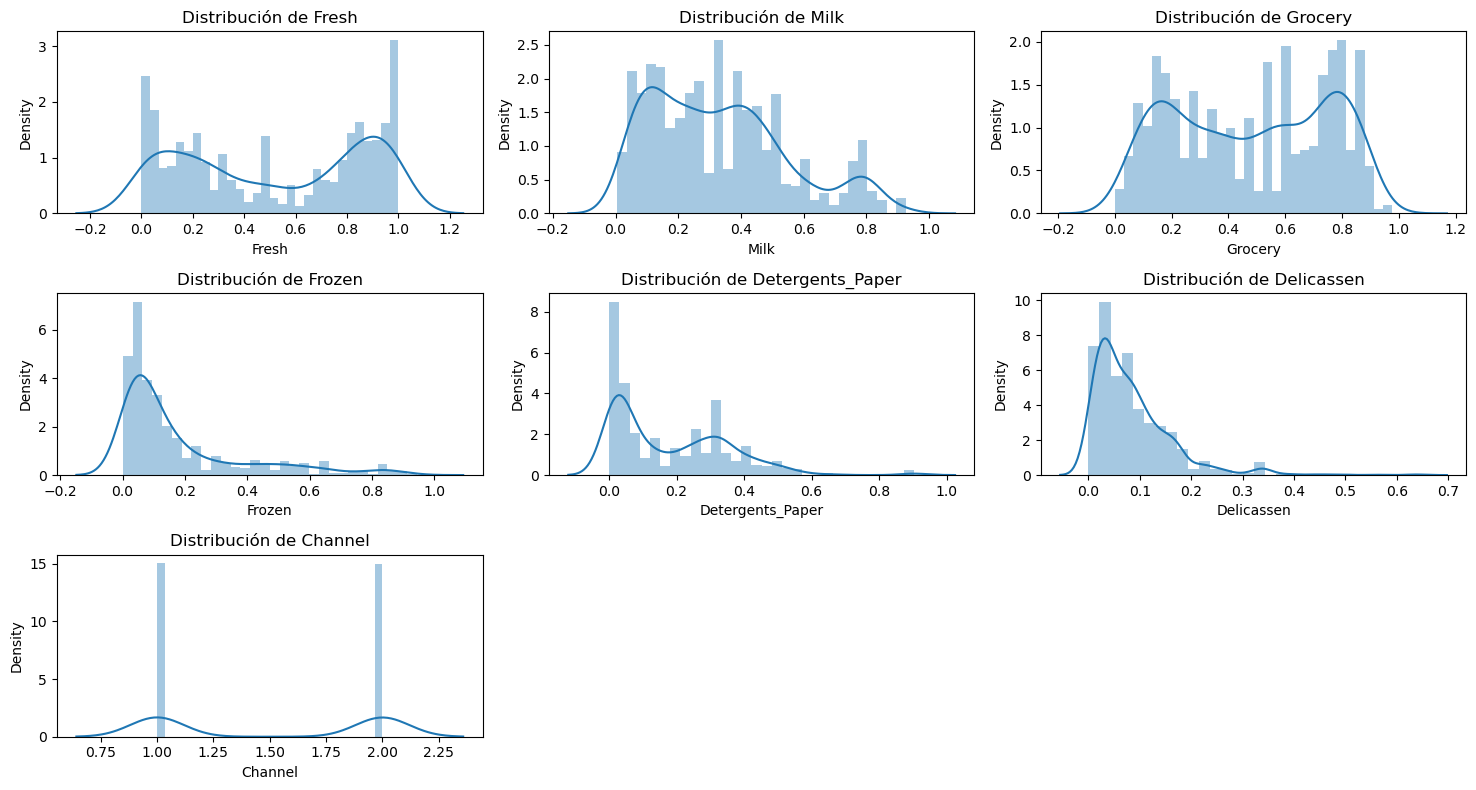

In [215]:
features = list(df_scaled2.columns)

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df_scaled2[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

In [216]:
# Data "original" preprocesada escalada con Normalizer
df_scaled2 = pd.DataFrame(df_scaled2, columns=df_scaled2.columns).copy()
df_scaled2['Channel'] = y

# PCA 3 componentes escalada con Normalizer
pca_3_2 = PCA(n_components=3)
X_pca_3_2 = pca_3_2.fit_transform(df_scaled2)

# PCA 2 componentes escalada con Normalizer
pca_2_2 = PCA(n_components=2)
X_pca_2_2 = pca_2_2.fit_transform(df_scaled2)

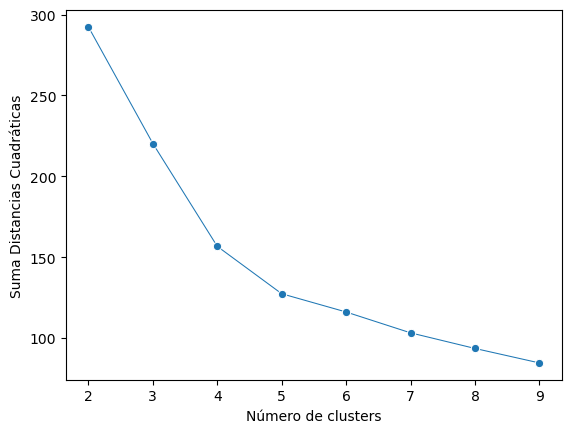

In [217]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans6=KMeans(n_clusters=k,random_state=0) 
    kmeans6.fit(df_scaled2)
    sq_distances.append(kmeans6.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

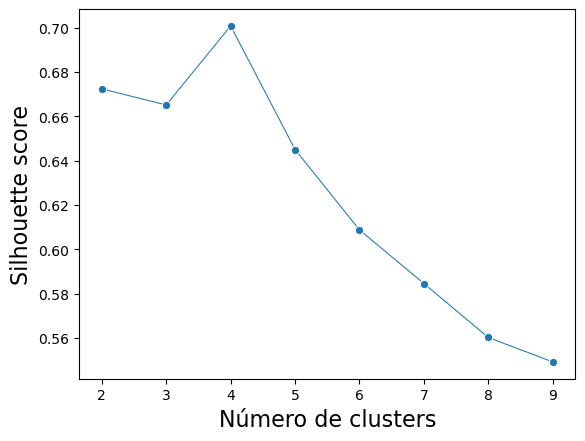

In [218]:
sil_normalizer_original=[]
k_values=range(2,10)

for k in k_values:
    kmeans6=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans6.fit(df_scaled2)
    score=silhouette_score(df_scaled2,kmeans6.labels_)
    sil_normalizer_original.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

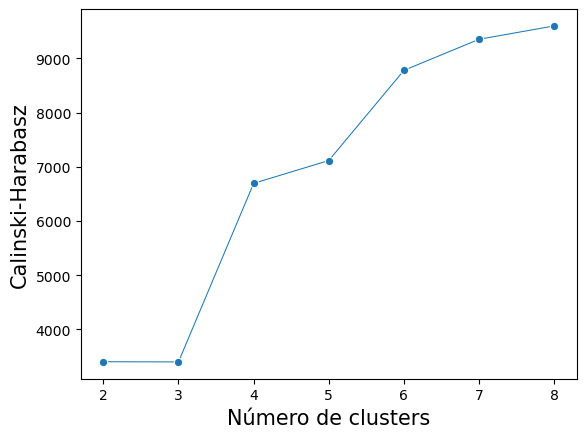

In [219]:
k_values=range(2,9);
ch_normalizer_original=[]

for k in k_values:
    
    kmeans6=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans6.fit(df_scaled2)
    score=calinski_harabasz_score(df_scaled2,kmeans6.labels_)
    ch_normalizer_original.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

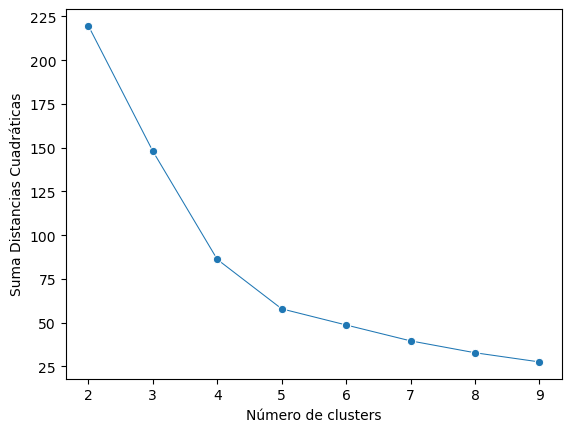

In [220]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans7=KMeans(n_clusters=k,random_state=0) 
    kmeans7.fit(X_pca_3_2)
    sq_distances.append(kmeans7.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

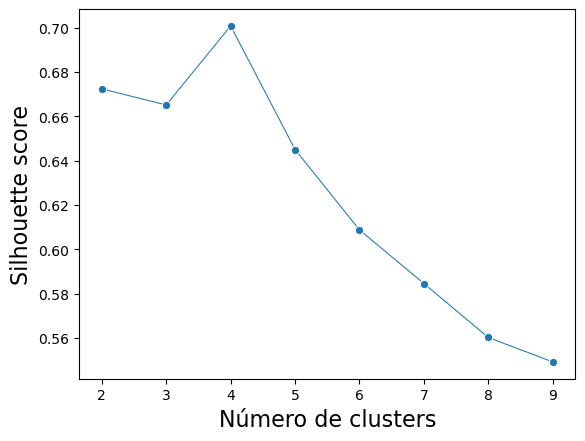

In [221]:
sil_normalizer_3=[]
k_values=range(2,10)

for k in k_values:
    kmeans7=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans7.fit(X_pca_3_2)
    score=silhouette_score(X_pca_3_2,kmeans7.labels_)
    sil_normalizer_3.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

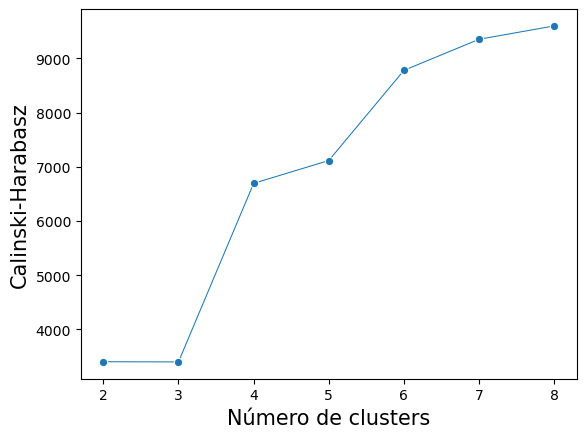

In [222]:
k_values=range(2,9);
ch_normalizer_3=[]

for k in k_values:
    
    kmeans7=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans7.fit(X_pca_3_2)
    score=calinski_harabasz_score(X_pca_3_2,kmeans7.labels_)
    ch_normalizer_3.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

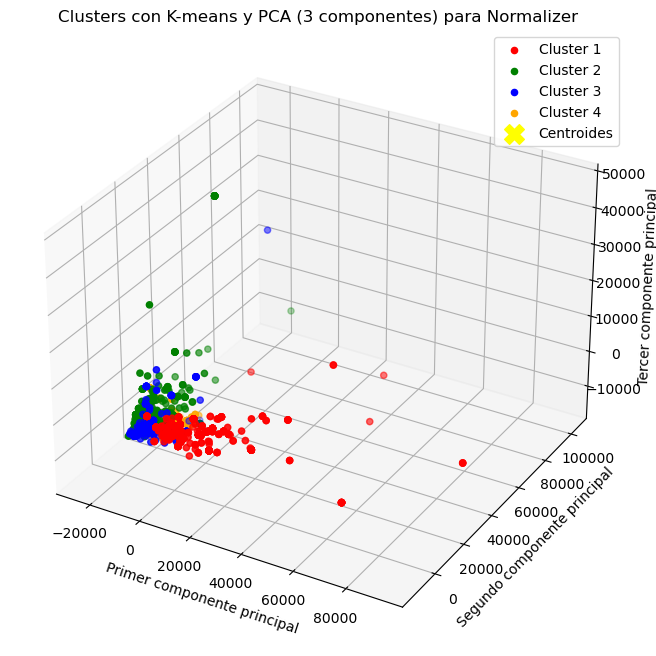

In [237]:
from mpl_toolkits.mplot3d import Axes3D

kmeans_3_pca3_Normalizer = KMeans(n_clusters=4, random_state=0).fit(X_pca_3_2)
labels_3_pca3_Normalizer = kmeans_3_pca3_Normalizer.labels_

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue','orange']
for i, color in zip(range(5), colors):
    ax.scatter(X_pca_3[labels_3_pca3_Normalizer == i, 0], X_pca_3[labels_3_pca3_Normalizer == i, 1], X_pca_3[labels_3_pca3_Normalizer == i, 2],color=color, label=f'Cluster {i+1}')

ax.scatter(kmeans_3_pca3_Normalizer.cluster_centers_[:, 0], kmeans_3_pca3_Normalizer.cluster_centers_[:, 1], kmeans_3_pca3_Normalizer.cluster_centers_[:, 2],s=200, c='yellow', marker='X', label='Centroides')
ax.set_title('Clusters con K-means y PCA (3 componentes) para Normalizer')
ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segundo componente principal')
ax.set_zlabel('Tercer componente principal')
ax.legend()
ax.grid(True)
plt.show()

In [238]:
# Porcentaje de varianza explicada por cada componente en PCA de 3 componentes
explained_variance_ratio_3_2 = pca_3_2.explained_variance_ratio_

explained_variance_ratio_df_3_2 = pd.DataFrame({
    'Componente Principal': ['PC1', 'PC2', 'PC3'],
    'Varianza Explicada (%)': explained_variance_ratio_3_2 * 100
})

explained_variance_ratio_df_3_2

,Componente Principal,Varianza Explicada (%)
0,PC1,68.037514
1,PC2,15.364573
2,PC3,6.771221


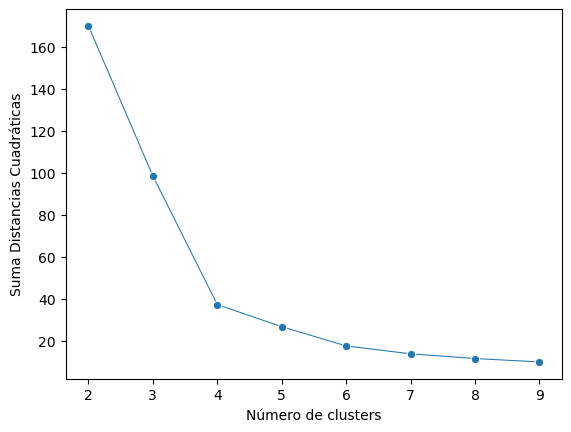

In [225]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans8=KMeans(n_clusters=k,random_state=0) 
    kmeans8.fit(X_pca_2_2)
    sq_distances.append(kmeans8.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Text(0.5, 0, 'Número de clusters')

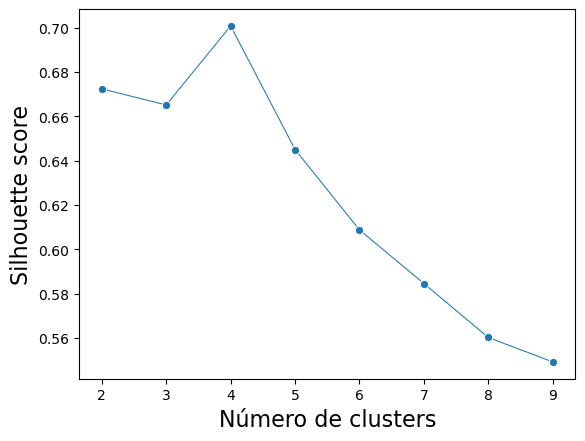

In [226]:
sil_normalizer_2=[]
k_values=range(2,10)

for k in k_values:
    kmeans8=KMeans(n_clusters=k,n_init=10,random_state=42) # Numero de repeticiones=10
    kmeans8.fit(X_pca_2_2)
    score=silhouette_score(X_pca_2_2,kmeans8.labels_)
    sil_normalizer_2.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16)

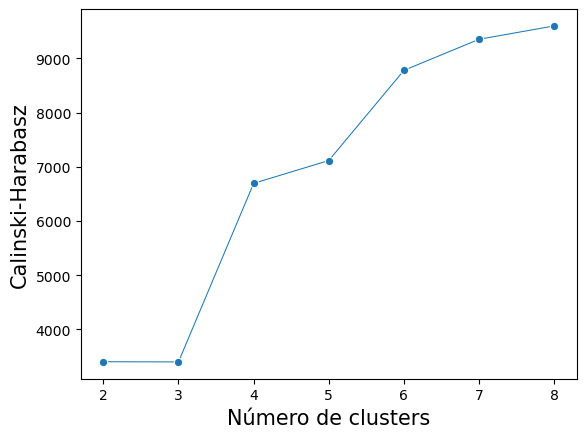

In [227]:
k_values=range(2,9);
ch_normalizer_2=[]

for k in k_values:
    
    kmeans9=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans9.fit(X_pca_2_2)
    score=calinski_harabasz_score(X_pca_2_2,kmeans9.labels_)
    ch_normalizer_2.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

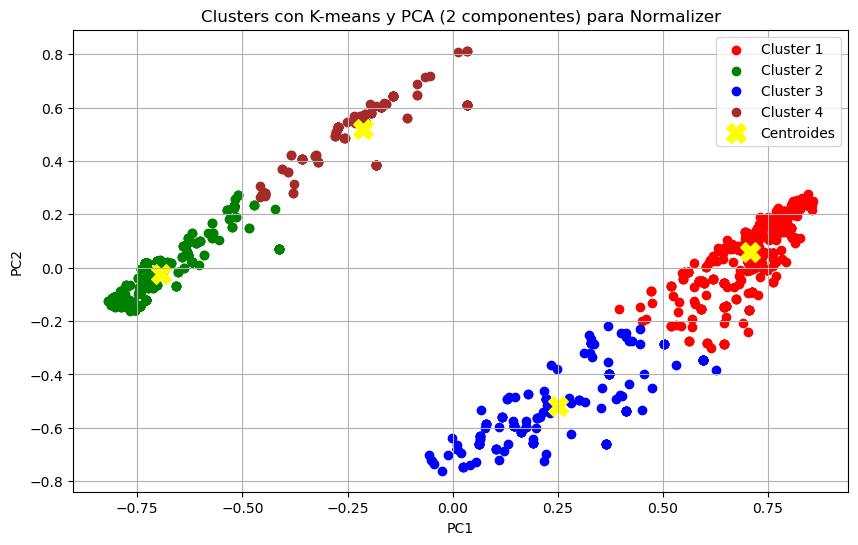

In [228]:
kmeans_Normalizer = KMeans(n_clusters=4, random_state=0).fit(X_pca_2_2)
labels_Normalizer = kmeans_Normalizer.labels_

plt.figure(figsize=(10, 6))
for i, color in zip(range(4), ['red', 'green', 'blue','brown']):
    plt.scatter(X_pca_2_2[labels_Normalizer == i, 0], X_pca_2_2[labels_Normalizer == i, 1], color=color, label=f'Cluster {i+1}')
    
plt.scatter(kmeans_Normalizer.cluster_centers_[:, 0], kmeans_Normalizer.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroides')
plt.title('Clusters con K-means y PCA (2 componentes) para Normalizer')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [229]:
# Porcentaje de varianza explicada por cada componente en PCA de 2 componentes
explained_variance_ratio_2 = pca_2_2.explained_variance_ratio_

explained_variance_ratio_df_2 = pd.DataFrame({
    'Componente Principal': ['PC1', 'PC2'],
    'Varianza Explicada (%)': explained_variance_ratio_1 * 100
})

explained_variance_ratio_df_2

,Componente Principal,Varianza Explicada (%)
0,PC1,84.389936
1,PC2,7.100870


In [245]:
print("Para Standard Scaler:")

pd.DataFrame({
        'PCA': ['3 componentes', '2 componentes', 'Sin PCA'],
        'Num clusters': [4, 4, 4],
        'Silhouette Score': [sil_standar_3[1], sil_standar_2[1], sil_standar_original[1]],
        'Calinski-Harabasz Score': [ch_standar_3[1], ch_standar_2[1], ch_standar_original[1], ]
    })

Para Standard Scaler:


,PCA,Num clusters,Silhouette Score,Calinski-Harabasz Score
0,3 componentes,4,0.426897,701.506642
1,2 componentes,4,0.461936,907.350975
2,Sin PCA,4,0.393480,592.740891


In [243]:
print(" Para MinMaxScaler Scaler:")

pd.DataFrame({
        'PCA': ['3 componentes', '2 componentes', 'Sin PCA'],
        'Num clusters': [4, 4, 4],
        'Silhouette Score': [sil_minmaxscaler_3[1], sil_minmaxscaler_2[1], sil_minmaxscaler_original[1]],
        'Calinski-Harabasz Score': [ch_minmaxscaler_3[1], ch_minmaxscaler_2[1], ch_minmaxscaler_original[1], ]
    })

 Para MinMaxScaler Scaler:


,PCA,Num clusters,Silhouette Score,Calinski-Harabasz Score
0,3 componentes,4,0.813033,7606.206967
1,2 componentes,4,0.865092,16964.617779
2,Sin PCA,4,0.761555,4815.307781


In [244]:
print("Para Normalizer Scaler:")

pd.DataFrame({
        'PCA': ['3 componentes', '2 componentes', 'Sin PCA'],
        'Num clusters': [4, 4, 4],
        'Silhouette Score': [sil_normalizer_3[1], sil_normalizer_2[1], sil_normalizer_original[1]],
        'Calinski-Harabasz Score': [ch_normalizer_3[1], ch_normalizer_2[1], ch_normalizer_original[1], ]
    })

Para Normalizer Scaler:


,PCA,Num clusters,Silhouette Score,Calinski-Harabasz Score
0,3 componentes,4,0.593614,2266.609842
1,2 componentes,4,0.665080,3401.016915
2,Sin PCA,4,0.512027,1525.117897


## Se observa que el mejor resultado tanto de Silhouette Score como de Calinski-Harabasz Score se obtiene cuando se usa PCA de 2 componentes (Sin utilizar variable "Channel" por su correlación muy baja.) para MinMaxScaler.